# Used Car Price Dataset
A Dataset for Predicting Used Car Prices
url: https://www.kaggle.com/datasets/rishabhkarn/used-car-dataset

About Dataset
🚗 Used Car Price Dataset: A dataset for predicting used car price 📊

Dive into the world of used cars with our dataset, perfect for predicting prices. It's a carefully selected set of data that car enthusiasts, analysts, and data scientists will find valuable. Whether you're curious or looking to analyze, this dataset is your guide to understanding the dynamics of how used cars are valued.

Key Features:

🛣️ Rich Attributes: Explore a number of attributes, including mileage, model year, fuel type, transmission, and more, providing a 360-degree view of each vehicle's specifications.
📉 Depreciation Insights: Uncover patterns in vehicle depreciation over time and across different makes and models, empowering you to make informed predictions about future price trends.
📱 Technological Integration: Seamlessly integrate our dataset into your predictive modeling pipelines, harnessing the power of technology to foresee changes in the used car market.
Potential Applications:

📈 Market Research: Conduct in-depth market research to identify trends, fluctuations, and hotspots in the used car industry.
🤖 Predictive Modeling: Build robust machine learning models to predict resale values, assisting buyers, sellers, and dealerships in making informed decisions.
🚀 Business Strategy: Inform business strategies for used car dealerships, insurance companies, and financial institutions by understanding the underlying factors influencing pricing.
How to Use:

🧑‍💻 Data Science Projects: Integrate this dataset into your data science projects to explore and analyze factors impacting used car prices.
🚀 Predictive Modeling: Train machine learning models to predict resale values based on historical data and a wide array of vehicle attributes.
🚗 Market Insights: Gain valuable insights into market dynamics, allowing you to stay ahead of trends and developments in the used car space.
Dataset Description:

1552 Rows, 15 Columns

Attributes:

car_name
registration_year
insurance_validity
fuel_type
seats
kms_driven
ownership
transmission
manufacturing_year
mileage(kmpl)
engine(cc)
max_power(bhp)
torque(Nm)
price(in lakhs)


Steps we plan to do:
1. Data Preprocessing
2. Data Visualization
3. Explarotary Data Analysis
4. Feature Selection and Transformation
5. Train-Test-Split
6. Model Creation
7. Model Prediction

## Step 1 - Importing, Exploring, and Preprocessing


In [43]:
import pandas as pd
import numpy as np


In [44]:
df = pd.read_csv('dataset/usedcardb.csv')
df.shape

(1553, 15)

In [45]:
df.head(3)

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

Based on the previous outputs, we need to first, drop the first column, 'Unnamed', as it is not usefull. Determine the columns with categorical values.

In [47]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(3)

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75


Let's look for null values.

In [48]:
print(df.isna().sum().sort_values(ascending=False))
print("Total number of rows containing missing values is: ", df.isna().any(axis=1).sum())

torque(Nm)            4
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
price(in lakhs)       0
dtype: int64
Total number of rows containing missing values is:  4


As the number of missing values are less, we can easily drop the rows containg missing values.

In [49]:
df.dropna(inplace=True)
print(df.isna().sum().sort_values(ascending=False))
print("Total number of rows containing missing values is: ", df.isna().any(axis=1).sum())

car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64
Total number of rows containing missing values is:  0


In [50]:
df.info(); df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1549 non-null   object 
 1   registration_year   1549 non-null   object 
 2   insurance_validity  1549 non-null   object 
 3   fuel_type           1549 non-null   object 
 4   seats               1549 non-null   int64  
 5   kms_driven          1549 non-null   int64  
 6   ownsership          1549 non-null   object 
 7   transmission        1549 non-null   object 
 8   manufacturing_year  1549 non-null   object 
 9   mileage(kmpl)       1549 non-null   float64
 10  engine(cc)          1549 non-null   float64
 11  max_power(bhp)      1549 non-null   float64
 12  torque(Nm)          1549 non-null   float64
 13  price(in lakhs)     1549 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 181.5+ KB


,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


According to these outputs, we have several columns that contains values that are categorical. Now we need to take care of these categorical data so that in traing step we don't encouter problems. 

The following columns contain categorical values: ['car_name', 'registration_year', 'insurance_validity', 'fuel_type', 'ownership', 'transmission', 'manufacturing_year']

Among this list, the 'manufacturing_year' column can be easily changed to the numerical value. For the remaining, we choose 'One Hot Encodding' strategy to deal with.

In [51]:
df['manufacturing_year'].unique()

array(['2017', '2020', '2018', '2019', '2015', '2021', '2014', '2022',
       '2010', '2011', '2023', '2016', '2009', '2013', 'Power Steering',
       '2012', 'Power Windows Front', 'Air Conditioner', '2007'],
      dtype=object)

As the output suggest, there are some dirty data in this column, we delete these data and then choose a random year for that.

In [52]:
default_year = 2015
df['manufacturing_year'] = df['manufacturing_year'].apply(lambda x: default_year if not x.isdigit() else x)
df['manufacturing_year'].unique()

array(['2017', '2020', '2018', '2019', '2015', '2021', '2014', '2022',
       '2010', '2011', '2023', '2016', '2009', '2013', 2015, '2012',
       '2007'], dtype=object)

Now that we have a homogenous data in the column, we convert it to int type.

In [53]:
df['manufacturing_year'] = df['manufacturing_year'].astype(int)
df['manufacturing_year'].info()

<class 'pandas.core.series.Series'>
Index: 1549 entries, 0 to 1552
Series name: manufacturing_year
Non-Null Count  Dtype
--------------  -----
1549 non-null   int64
dtypes: int64(1)
memory usage: 24.2 KB


Now there are other categorical columns: ['car_name', 
'registration_year', 
'insurance_validity', 
'fuel_type', 
'ownership', '
transmission'
]

that we need to take care of. Let's start with the first one, the 'car_name'.
    

In [54]:
len(df['car_name'].unique())


923

well, as the number of unique value for this columns is high, this columns' values cannot affect the model output too much. Hence, for simplicity, we can either easily remove this column from the data that we wish to train, or we use a usefull method for the transformation. For this category we use the Frequency Encoding method. 

It Replace each category with the frequency of its occurrence in the dataset. This method preserves the information about the frequency of each category but avoids the high dimensionality problem.

In [55]:
frequency_map = df['car_name'].value_counts(normalize=True)

# Map frequencies to categories
df['car_name_enc'] = df['car_name'].map(frequency_map)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1549 non-null   object 
 1   registration_year   1549 non-null   object 
 2   insurance_validity  1549 non-null   object 
 3   fuel_type           1549 non-null   object 
 4   seats               1549 non-null   int64  
 5   kms_driven          1549 non-null   int64  
 6   ownsership          1549 non-null   object 
 7   transmission        1549 non-null   object 
 8   manufacturing_year  1549 non-null   int64  
 9   mileage(kmpl)       1549 non-null   float64
 10  engine(cc)          1549 non-null   float64
 11  max_power(bhp)      1549 non-null   float64
 12  torque(Nm)          1549 non-null   float64
 13  price(in lakhs)     1549 non-null   float64
 14  car_name_enc        1549 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 193.6+ KB


In [56]:
df['car_name_enc'].nunique()

11

Now, we can remove the car_name column as we have its encoded column. We do the drops at the end of columns' tranformations. Let's take a look at the 'registration_year' column.

In [57]:
print("The number of unique values for the 'registration_year' column is: ", df['registration_year'].nunique())

frequency_map = df['registration_year'].value_counts(normalize=True)
# Map frequencies to categories
df['registration_year_enc'] = df['registration_year'].map(frequency_map)

print("The number of unique values for the 'registration_year_enc' column is: ", df['registration_year_enc'].nunique(), '\n\n')

df.info()

The number of unique values for the 'registration_year' column is:  176
The number of unique values for the 'registration_year_enc' column is:  29 


<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_name               1549 non-null   object 
 1   registration_year      1549 non-null   object 
 2   insurance_validity     1549 non-null   object 
 3   fuel_type              1549 non-null   object 
 4   seats                  1549 non-null   int64  
 5   kms_driven             1549 non-null   int64  
 6   ownsership             1549 non-null   object 
 7   transmission           1549 non-null   object 
 8   manufacturing_year     1549 non-null   int64  
 9   mileage(kmpl)          1549 non-null   float64
 10  engine(cc)             1549 non-null   float64
 11  max_power(bhp)         1549 non-null   float64
 12  torque(Nm)     

We continue this method for the remaining categorical columns.

In [58]:
print("The number of unique values for the 'insurance_validity' column is: ", df['insurance_validity'].nunique())

frequency_map = df['insurance_validity'].value_counts(normalize=True)
# Map frequencies to categories
df['insurance_validity_enc'] = df['insurance_validity'].map(frequency_map)

print("The number of unique values for the 'insurance_validity_enc' column is: ", df['insurance_validity_enc'].nunique(), '\n\n')

df.info()

The number of unique values for the 'insurance_validity' column is:  6
The number of unique values for the 'insurance_validity_enc' column is:  5 


<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_name                1549 non-null   object 
 1   registration_year       1549 non-null   object 
 2   insurance_validity      1549 non-null   object 
 3   fuel_type               1549 non-null   object 
 4   seats                   1549 non-null   int64  
 5   kms_driven              1549 non-null   int64  
 6   ownsership              1549 non-null   object 
 7   transmission            1549 non-null   object 
 8   manufacturing_year      1549 non-null   int64  
 9   mileage(kmpl)           1549 non-null   float64
 10  engine(cc)              1549 non-null   float64
 11  max_power(bhp)          1549 non-null   float64
 12  to

In [59]:
print("The number of unique values for the 'fuel_type' column is: ", df['fuel_type'].nunique())

frequency_map = df['fuel_type'].value_counts(normalize=True)
# Map frequencies to categories
df['fuel_type_enc'] = df['fuel_type'].map(frequency_map)

print("The number of unique values for the 'fuel_type_enc' column is: ", df['fuel_type_enc'].nunique(), '\n\n')

df.info()

The number of unique values for the 'fuel_type' column is:  4
The number of unique values for the 'fuel_type_enc' column is:  4 


<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_name                1549 non-null   object 
 1   registration_year       1549 non-null   object 
 2   insurance_validity      1549 non-null   object 
 3   fuel_type               1549 non-null   object 
 4   seats                   1549 non-null   int64  
 5   kms_driven              1549 non-null   int64  
 6   ownsership              1549 non-null   object 
 7   transmission            1549 non-null   object 
 8   manufacturing_year      1549 non-null   int64  
 9   mileage(kmpl)           1549 non-null   float64
 10  engine(cc)              1549 non-null   float64
 11  max_power(bhp)          1549 non-null   float64
 12  torque(Nm)          

In [60]:
print("The number of unique values for the 'ownsership' column is: ", df['ownsership'].nunique())

frequency_map = df['ownsership'].value_counts(normalize=True)
# Map frequencies to categories
df['ownsership_enc'] = df['ownsership'].map(frequency_map)

print("The number of unique values for the 'ownsership_enc' column is: ", df['ownsership_enc'].nunique(), '\n\n')

df.info()

The number of unique values for the 'ownsership' column is:  22
The number of unique values for the 'ownsership_enc' column is:  7 


<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_name                1549 non-null   object 
 1   registration_year       1549 non-null   object 
 2   insurance_validity      1549 non-null   object 
 3   fuel_type               1549 non-null   object 
 4   seats                   1549 non-null   int64  
 5   kms_driven              1549 non-null   int64  
 6   ownsership              1549 non-null   object 
 7   transmission            1549 non-null   object 
 8   manufacturing_year      1549 non-null   int64  
 9   mileage(kmpl)           1549 non-null   float64
 10  engine(cc)              1549 non-null   float64
 11  max_power(bhp)          1549 non-null   float64
 12  torque(Nm)       

In [61]:
print("The number of unique values for the 'transmission' column is: ", df['transmission'].nunique())

frequency_map = df['transmission'].value_counts(normalize=True)
# Map frequencies to categories
df['transmission_enc'] = df['transmission'].map(frequency_map)

print("The number of unique values for the 'transmission_enc' column is: ", df['transmission_enc'].nunique(), '\n\n')

df.info()

The number of unique values for the 'transmission' column is:  13
The number of unique values for the 'transmission_enc' column is:  7 


<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_name                1549 non-null   object 
 1   registration_year       1549 non-null   object 
 2   insurance_validity      1549 non-null   object 
 3   fuel_type               1549 non-null   object 
 4   seats                   1549 non-null   int64  
 5   kms_driven              1549 non-null   int64  
 6   ownsership              1549 non-null   object 
 7   transmission            1549 non-null   object 
 8   manufacturing_year      1549 non-null   int64  
 9   mileage(kmpl)           1549 non-null   float64
 10  engine(cc)              1549 non-null   float64
 11  max_power(bhp)          1549 non-null   float64
 12  torque(Nm)   

We the 'Frequency Encoding' method, we have not only remove the large unique values, but also we have transformed the categorical values to numerical values rangning between 0 and 1. 

Now, firstly, let's drop the categorical columns as we don't need them anymore and then continue toward the second step.

In [62]:
df = df.drop(['car_name', 'registration_year', 'insurance_validity', 'fuel_type', 'ownsership', 'transmission'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seats                   1549 non-null   int64  
 1   kms_driven              1549 non-null   int64  
 2   manufacturing_year      1549 non-null   int64  
 3   mileage(kmpl)           1549 non-null   float64
 4   engine(cc)              1549 non-null   float64
 5   max_power(bhp)          1549 non-null   float64
 6   torque(Nm)              1549 non-null   float64
 7   price(in lakhs)         1549 non-null   float64
 8   car_name_enc            1549 non-null   float64
 9   registration_year_enc   1549 non-null   float64
 10  insurance_validity_enc  1549 non-null   float64
 11  fuel_type_enc           1549 non-null   float64
 12  ownsership_enc          1549 non-null   float64
 13  transmission_enc        1549 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 181.5 

Having a normalized values is important. So in the next step we will first explore our data visually and then we decide whether the data needs further pre-processing or not.

## Step 2 - Data Visualization

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

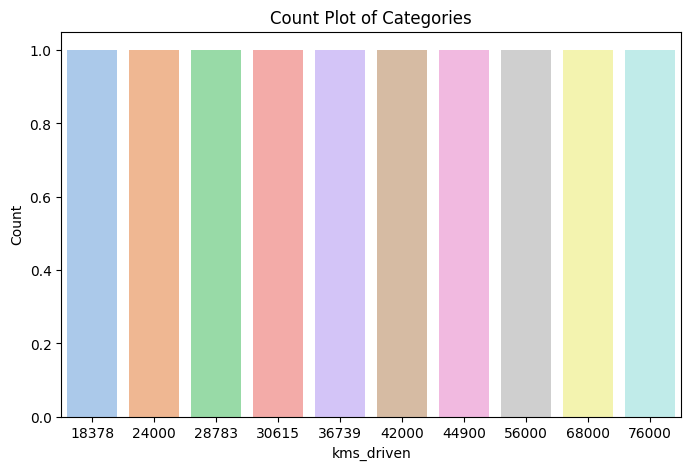

In [71]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df.iloc[:10], x='kms_driven', palette='pastel', hue='kms_driven', legend=False)
plt.xlabel('kms_driven')
plt.ylabel('Count')
plt.title('Count Plot of Categories')
plt.show()